# Kaggle's Flavours of Physics: the second-ranked solution

This is a solution ranked second on the [Private Leaderboard](https://www.kaggle.com/c/flavours-of-physics/leaderboard) of the Kaggle ["Flavours of Physics: Finding τ → μμμ"](https://www.kaggle.com/c/flavours-of-physics) competition. The model is based on [gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting) and implemented in Python with the help of the [XGBoost](https://github.com/dmlc/xgboost) library. It is simply a combination of two XGBoost classifiers (boosters) trained on different sets of features. The first booster is an ensemble of 200 [decision trees](https://en.wikipedia.org/wiki/Decision_tree) targeting mostly geometric features (such as impact parameters and track isolation variables). The second booster consists of 100 trees trained on purely kinematic features. Final prediction is a weighted average of the probabilities predicted by the individual classifiers (with a weight of 0.78 assigned to the first booster). Combining two independent classifiers allows us to easily pass the [correlation test](https://www.kaggle.com/c/flavours-of-physics/details/correlation-test). To pass the [agreement test](https://www.kaggle.com/c/flavours-of-physics/details/agreement-test), the only thing needed is to exclude *SPDhits* from the features used in the training process.

Run this notebook to reproduce the second place entry.

In [20]:
import xgboost, os

In [10]:
xgboost.__version__

'0.4'

## Getting the data

You will have to first download the data manually from the ["Flavours of Physics: Finding τ → μμμ"](https://www.kaggle.com/c/flavours-of-physics/data) competition webpage. Unfortunately the data is not yet public, so you will have to perform this manual step at the moment. You want to download:

 * `check_correlation.csv`
 * `training.csv`
 * `check_agreement.csv`
 * `test.csv`
 
After downloading then place them on a publically available webspace like: [dropbox](https://dropbbox.com), [cernbox](https://cernbox.cern.ch) and download them from there.

In [ ]:
%%bash
if [ ! -f data/test.csv ] ; then
    wget https://www.dropbox.com/s/i57vmpuaqt19gv6/check_correlation.csv?dl=0 -O data/check_correlation.csv
    wget https://www.dropbox.com/s/hydjllrzpu24vyc/training.csv?dl=0 -O data/training.csv
    wget https://www.dropbox.com/s/olkwi7jcbq6trze/check_agreement.csv?dl=0 -O data/check_agreement.csv
    wget https://www.dropbox.com/s/22hijx45a6pazcp/test.csv?dl=0 -O data/test.csv
else
    echo "File 'test.csv' already exists"
fi

In [ ]:
assert os.path.exists("data/training.csv"), "'training.csv' file not found"

## Training the model

Now we can start training the models that ranked second in the competition. The submission uses the `xgboost` library.

In [ ]:
# %load parameters.py
# https://github.com/gramolin/flavours-of-physics

# Random seed:
random_state = 1

# Weight for the first booster:
w1 = 0.78

# Numbers of trees:
num_trees1 = 200 # Booster 1
num_trees2 = 100 # Booster 2

# Parameters of the first booster:
params1 = {'objective': 'binary:logistic',
           'eta': 0.05,
           'max_depth': 4,
           'scale_pos_weight': 5.,
           'silent': 1,
           'seed': random_state}

# Parameters of the second booster:
params2 = {'objective': 'binary:logistic',
           'eta': 0.05,
           'max_depth': 4,
           'scale_pos_weight': 5.,
           'silent': 1,
           "seed": random_state}


The hard work happens in [`train.py`](/edit/train.py) and [`predict.py`](/edit/predict.py) which you can both inspect and edit. In addition to the provided features in the data set a few additional ones are calculated:

  * __*E*__ is the full energy of the mother particle calculated assuming that the final-state particles p0, p1, and p2 are muons (*E* = *E0* + *E1* + *E2*).
  * __*FlightDistanceSig*__ is the ratio (*FlightDistance* / *FlightDistanceError*).
  * __*DOCA_sum*__ is the sum (*DOCAone* + *DOCAtwo* + *DOCAthree*).
  * __*isolation_sum*__ is the sum (*isolationa* + *isolationb* + *isolationc* + *isolationd* + *isolatione* + *isolationf*).
  * __*IsoBDT_sum*__ is the sum (*p0_IsoBDT* + *p1_IsoBDT* + *p2_IsoBDT*).
  * __*track_Chi2Dof*__ is calculated as sqrt[(*p0_track_Chi2Dof* – 1)^2 + (*p1_track_Chi2Dof* – 1)^2 + (*p2_track_Chi2Dof* – 1)^2].
  * __*IP_sum*__ is the sum (*p0_IP* + *p1_IP* + *p2_IP*).
  * __*IPSig_sum*__ is the sum (*p0_IPSig* + *p1_IPSig* + *p2_IPSig*).
  * __*CDF_sum*__ is the sum (*CDF1* + *CDF2* + *CDF3*).

In [ ]:
%time
%run train.py

In [ ]:
assert os.path.exists("data/test.csv"), "'test.csv' file not found"

In [21]:
%time
%run predict.py

## Plotting

You can also make some basic plots.

In [23]:
import pandas

In [24]:
submission = pandas.read_csv('submission.csv', sep=',')

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


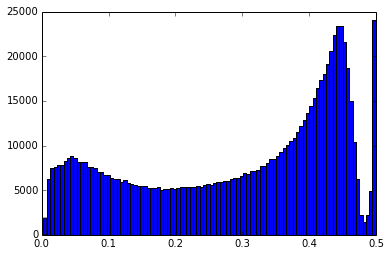

In [29]:
pylab.hist(submission.prediction, bins=100)
pass